In [29]:
%matplotlib inline

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
vine_df = pd.read_csv("Resources/vine_table.csv")
vine_df

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
0,R2UM5QMHBHC90Q,5,0,0,N,Y
1,RF0D1LEIF6L7,4,0,0,N,Y
2,RM6YKIWQVNSY,1,6,6,N,Y
3,R1RL3L68ASPS36,4,0,0,N,Y
4,R1U4XFBFAG34CY,5,0,0,N,Y
...,...,...,...,...,...,...
1740969,R35Q0AQ8SH345M,5,19,20,N,N
1740970,R23HAHNJHNIRQX,5,13,13,N,Y
1740971,R3LKB2S1HU172D,5,176,180,N,N
1740972,RBU9188F59ZRI,5,33,52,N,Y


In [4]:
votes_20_plus_df = vine_df.loc[vine_df["total_votes"] >= 20]
votes_20_plus_df

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
16,RXAHWIC1584UQ,5,20,23,N,Y
66,RSBELAIC899DO,5,46,51,N,Y
130,R2HCC4CJ59D225,4,43,43,N,Y
329,R39BVCCVPRV6F5,5,10,22,N,Y
609,RL9VF9WXHEHKR,5,35,36,N,Y
...,...,...,...,...,...,...
1740965,RQ11DPJXOBJQI,4,61,62,N,N
1740966,RT6Z2LXX3XEX3,5,27,28,N,N
1740969,R35Q0AQ8SH345M,5,19,20,N,N
1740971,R3LKB2S1HU172D,5,176,180,N,N


In [8]:
pop_help_vote_df = votes_20_plus_df.loc[(votes_20_plus_df["helpful_votes"]/votes_20_plus_df["total_votes"]) >= 0.5]
pop_help_vote_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31827 entries, 16 to 1740972
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   review_id          31827 non-null  object
 1   star_rating        31827 non-null  int64 
 2   helpful_votes      31827 non-null  int64 
 3   total_votes        31827 non-null  int64 
 4   vine               31827 non-null  object
 5   verified_purchase  31827 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.7+ MB


In [10]:
pop_help_vote_df["vine"].unique()

array(['N', 'Y'], dtype=object)

In [65]:
paid_review_df = pop_help_vote_df.loc[pop_help_vote_df["vine"] == 'Y']
tot_paid_reviews = paid_review_df["review_id"].count()
paid_5star_reviews = paid_review_df["star_rating"].loc[paid_review_df["star_rating"] == 5].count()
paid_review_avg = round(paid_review_df["star_rating"].mean(), 2)

In [66]:
unpaid_review_df = pop_help_vote_df.loc[pop_help_vote_df["vine"] == 'N']
tot_unpaid_reviews = unpaid_review_df["review_id"].count()
unpaid_5star_reviews = unpaid_review_df["star_rating"].loc[unpaid_review_df["star_rating"] == 5].count()
unpaid_review_avg = round(unpaid_review_df["star_rating"].mean(), 2)

In [71]:
percent_5star_paid = (paid_5star_reviews / tot_paid_reviews) * 100
percent_5star_unpaid = (unpaid_5star_reviews / tot_unpaid_reviews) * 100
print(f'vine (paid) 5 star reviews: {round(percent_5star_paid, 2)}%')
print(f'unpaid 5 star reviews: {round(percent_5star_unpaid, 2)}%')

vine (paid) 5 star reviews: 57.19%
unpaid 5 star reviews: 46.33%


In [37]:
unpaid_reviews = unpaid_review_df["star_rating"].to_list()
paid_reviews = paid_review_df["star_rating"].to_list()

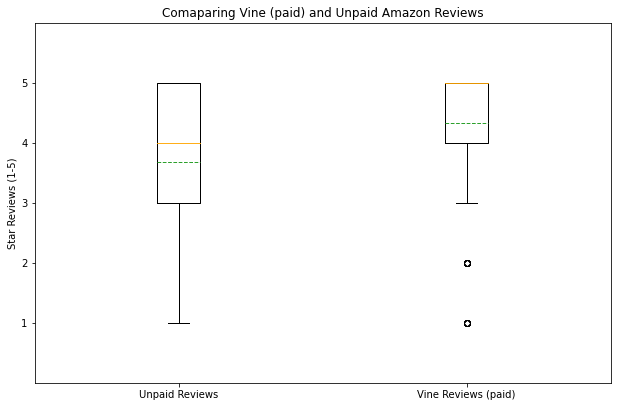

<Figure size 432x288 with 0 Axes>

In [59]:
data = [unpaid_reviews, paid_reviews]
 
fig = plt.figure(figsize =(8, 5))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data, 
                labels=["Unpaid Reviews", "Vine Reviews (paid)"], 
                showmeans=True,
                medianprops={"color": "orange", "linewidth": 0.9},
                meanline=True)

ax.set(ylim=(0, 6), 
       yticks=np.arange(1, 6), 
       ylabel="Star Reviews (1-5)", 
       title="Comaparing Vine (paid) and Unpaid Amazon Reviews")
# show plot
plt.show()
plt.savefig("Resources/Boxplot.png")

In [63]:
paid_review_df["star_rating"].describe()

count    285.000000
mean       4.326316
std        0.958014
min        1.000000
25%        4.000000
50%        5.000000
75%        5.000000
max        5.000000
Name: star_rating, dtype: float64

In [64]:
unpaid_review_df["star_rating"].describe()

count    31542.000000
mean         3.683184
std          1.526128
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: star_rating, dtype: float64

In [69]:
data = {'total_reviews': [tot_paid_reviews, tot_unpaid_reviews],
        'average_review_score': [paid_review_avg, unpaid_review_avg],
        'total_5_star_reviews': [paid_5star_reviews, unpaid_5star_reviews],
        'percentage_5_star_review': [round(percent_5star_paid, 2), round(percent_5star_unpaid, 2)],
        }

df = pd.DataFrame(data, index=['vine (paid) reviews','unpaid reviews'])
df

,total_reviews,average_review_score,total_5_star_reviews,percentage_5_star_review
vine (paid) reviews,285,4.33,163,57.19
unpaid reviews,31542,3.68,14614,46.33
